In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [5]:
%%javascript
// show everything, no scrolling
IPython.OutputArea.prototype._should_scroll = function(lines) {
return false; 
}

<IPython.core.display.Javascript object>

In [6]:
# import data from cleaning
df = pd.read_csv('../data/station_traffic.csv')
del df['Unnamed: 0']

In [7]:
# get utica av data
df_utica = df[df.STATION == 'UTICA AV'].copy()
df_utica = df_utica[df_utica.DT <= '05/26/2017']


In [8]:
# format the bin for plotting
df_utica.formatbin = df_utica.apply(
    lambda x: x['DT'] + " " + x['Time_Range'], axis = 1)

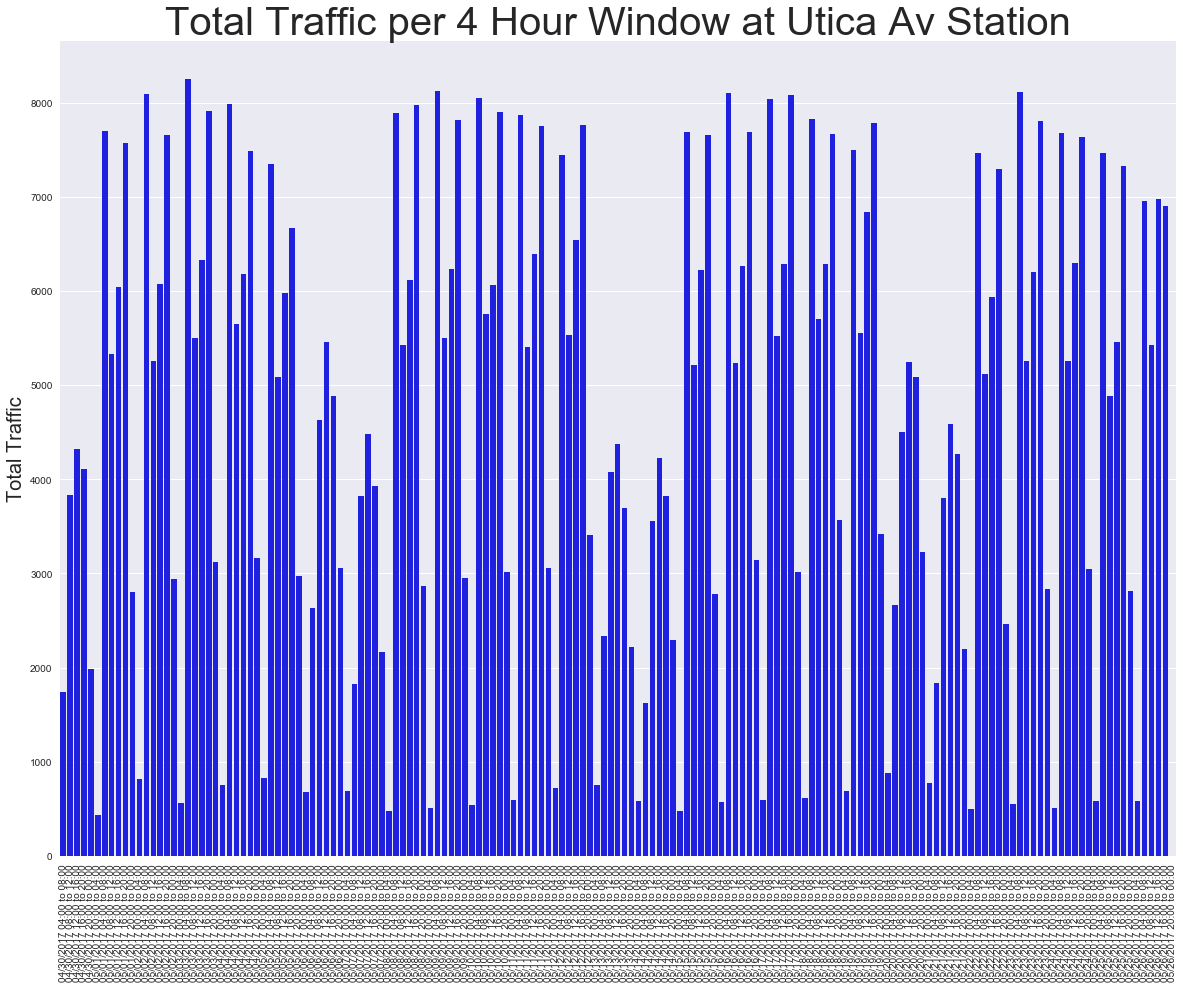

In [9]:
fig, ax = plt.subplots()
fig.set_size_inches(20,15)

sns.set(font_scale=.5)

fig=sns.barplot(x = df_utica.formatbin, y = df_utica.Total_Traffic, color='blue')
ax.set_xticklabels(df_utica.formatbin, rotation=90);

fig.set_title("Total Traffic per 4 Hour Window at Utica Av Station",
              fontsize=40)

ax.set_ylabel('Total Traffic', fontsize=20)

In [10]:
# categorical axis, sort by SMTWTFS
df_utica_daily = df_utica.groupby(['DT','Day']).sum().reset_index()
df_utica_daily['xaxis'] = df_utica_daily.apply(
    lambda x: x['Day'] + " " + x['DT'], axis=1)

day_list = ['Sunday', 'Monday', 'Tuesday',
            'Wednesday', 'Thursday', 'Friday', 'Saturday']
df_utica_daily['Day'] = pd.Categorical(
    df_utica_daily['Day'], categories=day_list, ordered=True)

df_utica_daily = df_utica_daily.sort_values(['Day','DT']).reset_index()
df_utica_daily = df_utica_daily.sort_index()
df_utica_daily = df_utica_daily.reset_index()


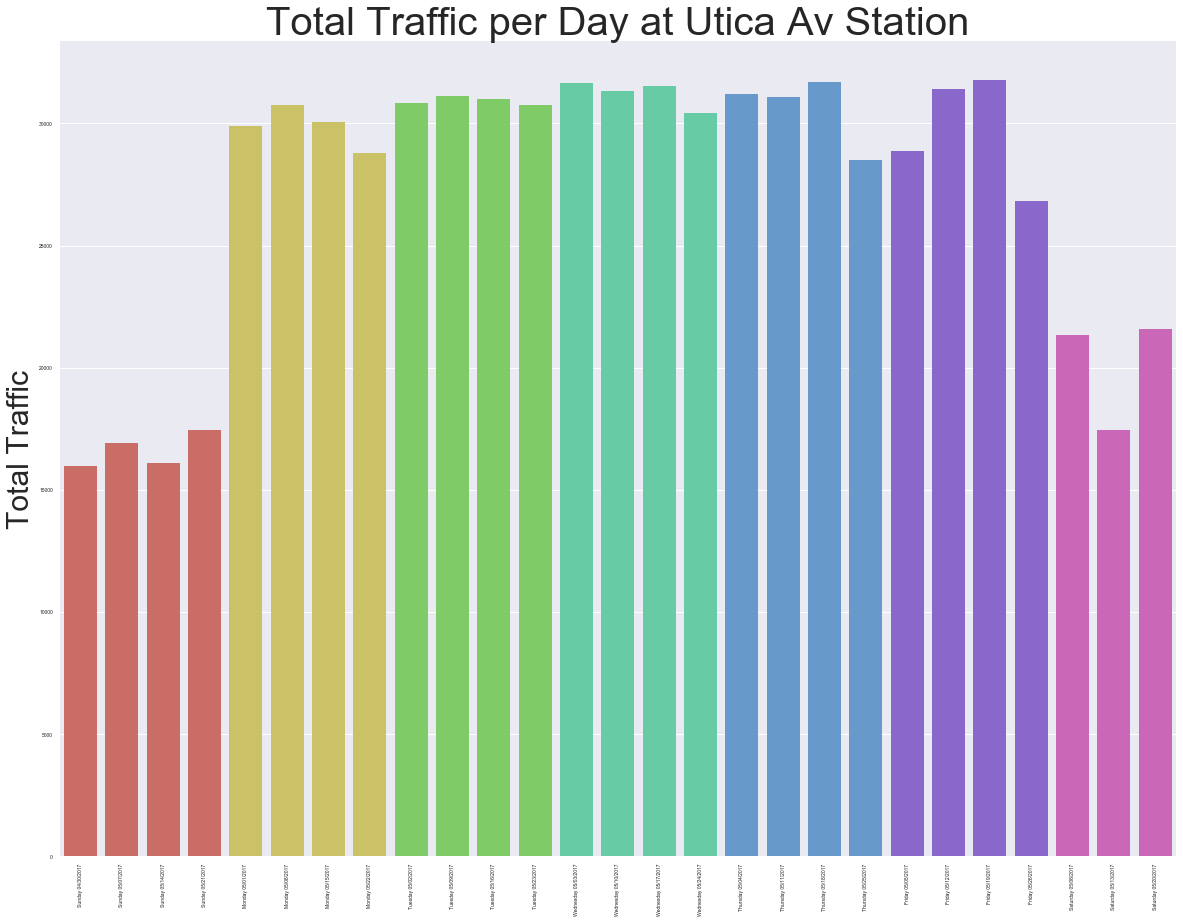

In [11]:
# set color palette for pretty graphing
current_palette = sns.color_palette("hls", 7)
d_st_clr = {}

for i in range(7):
    d_st_clr[day_list[i]] = current_palette[i]
df_utica_daily['color'] = df_utica_daily["Day"].map(d_st_clr)

fig, ax = plt.subplots()
fig.set_size_inches(20,15)

sns.set(font_scale=2)

fig=sns.barplot(x = df_utica_daily.DT, 
                y = df_utica_daily.Total_Traffic, 
                palette = df_utica_daily.color)
ax.set_xticklabels(df_utica_daily.xaxis, rotation=90);

fig.set_title("Total Traffic per Day at Utica Av Station",
              fontsize=40)
ax.set_xlabel('')

ax.set_ylabel('Total Traffic', fontsize=30)

In [12]:
# categorical axis, sort by SMTWTFS
df_utica.sort_values(['Time_Range','Day'], inplace = True)

df_utica['Day'] = pd.Categorical(
    df_utica['Day'], categories=day_list, ordered=True)

df_utica = df_utica.sort_values(['Time_Range','Day']).reset_index()
df_utica = df_utica.sort_index()
df_utica = df_utica.reset_index()

In [13]:
# make pretty axis labels
df_utica['range_dt'] = df_utica.apply(
    lambda x: x['Day'] + " " + x['DT'], axis=1)

time_list = ['00:00 to 04:00', '04:00 to 08:00',
                   '08:00 to 12:00', '12:00 to 16:00',
                   '16:00 to 20:00', '20:00 to 00:00']

#make list of dataframes to be plotted
plot_list = []

for index, time in enumerate(time_list):
    plot_list.append(df_utica[df_utica.Time_Range == time].copy())
    plot_list[index]['color'] = plot_list[index]["Day"].map(d_st_clr)
    

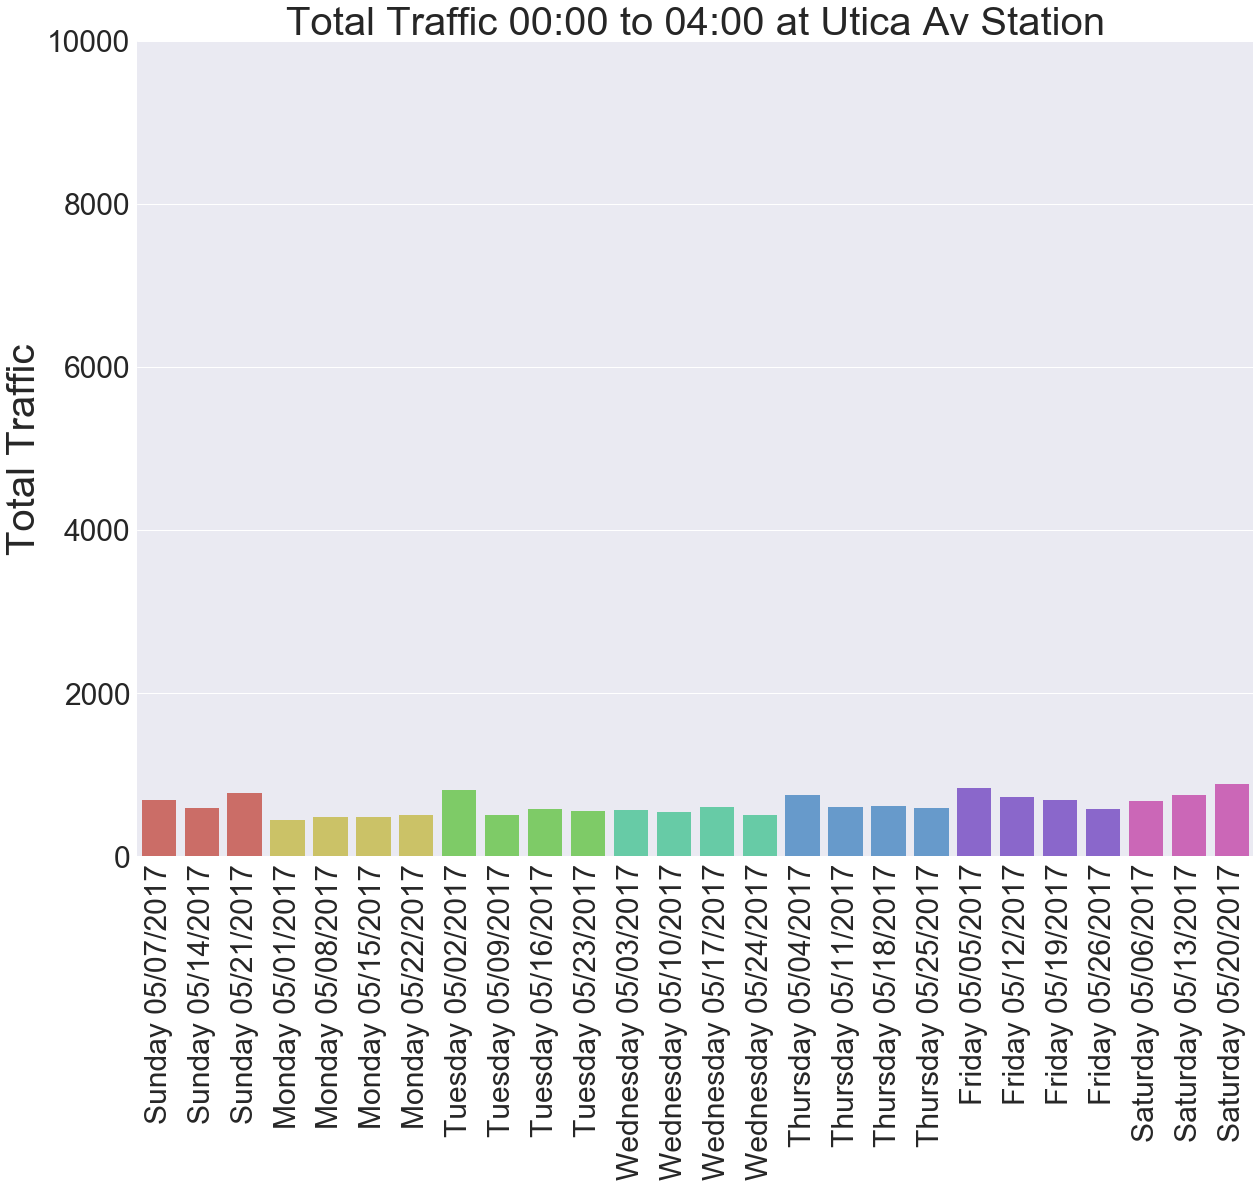

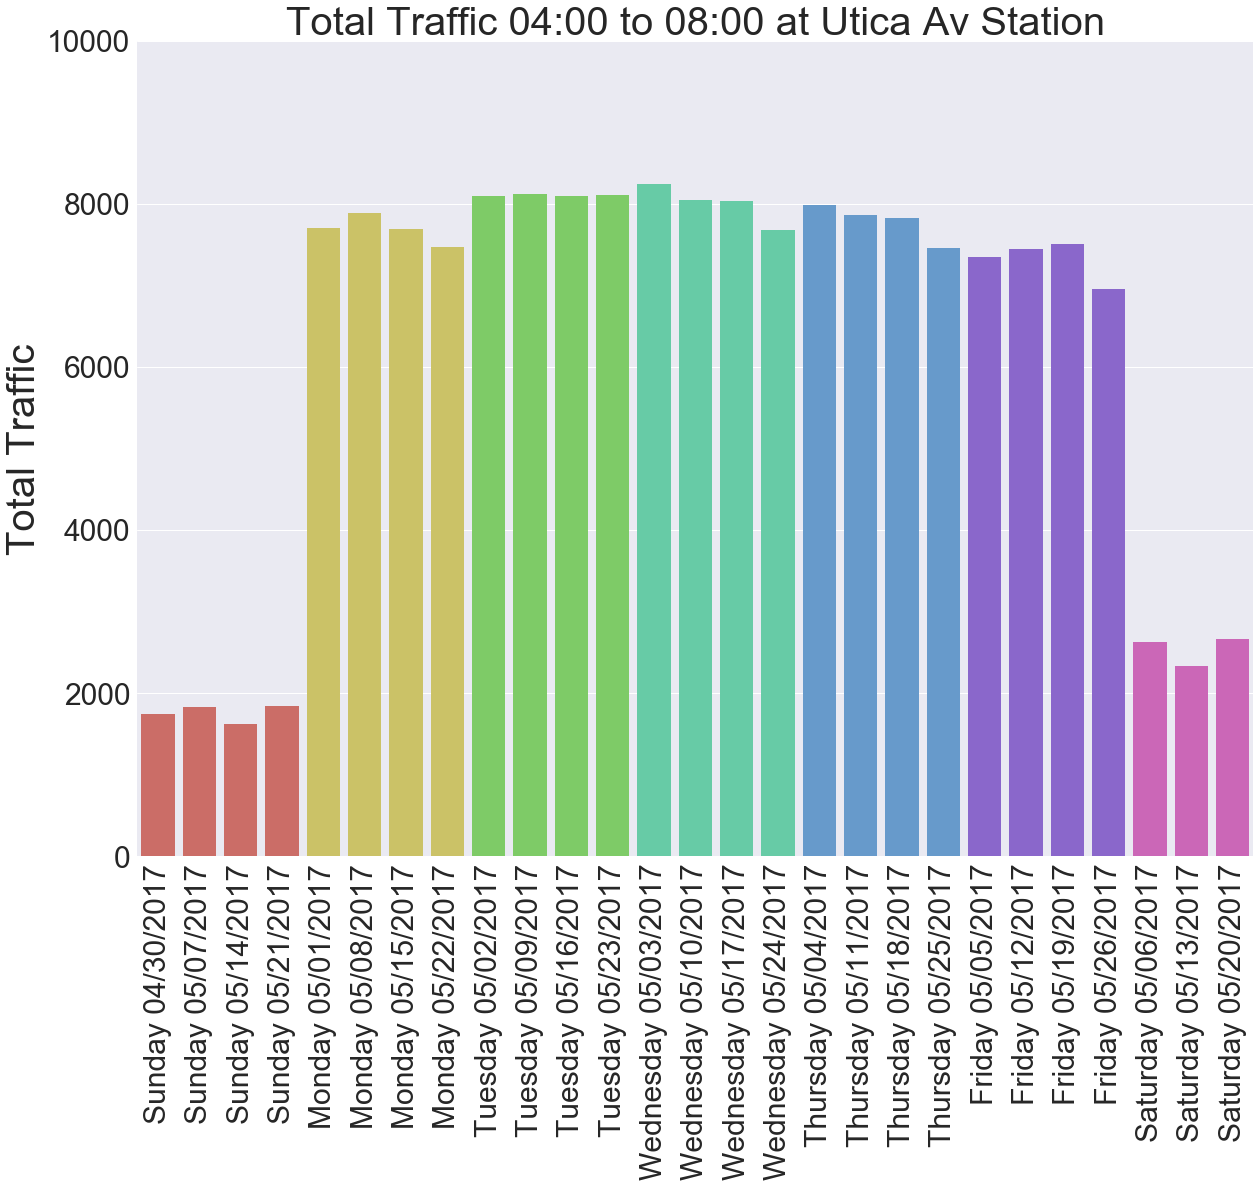

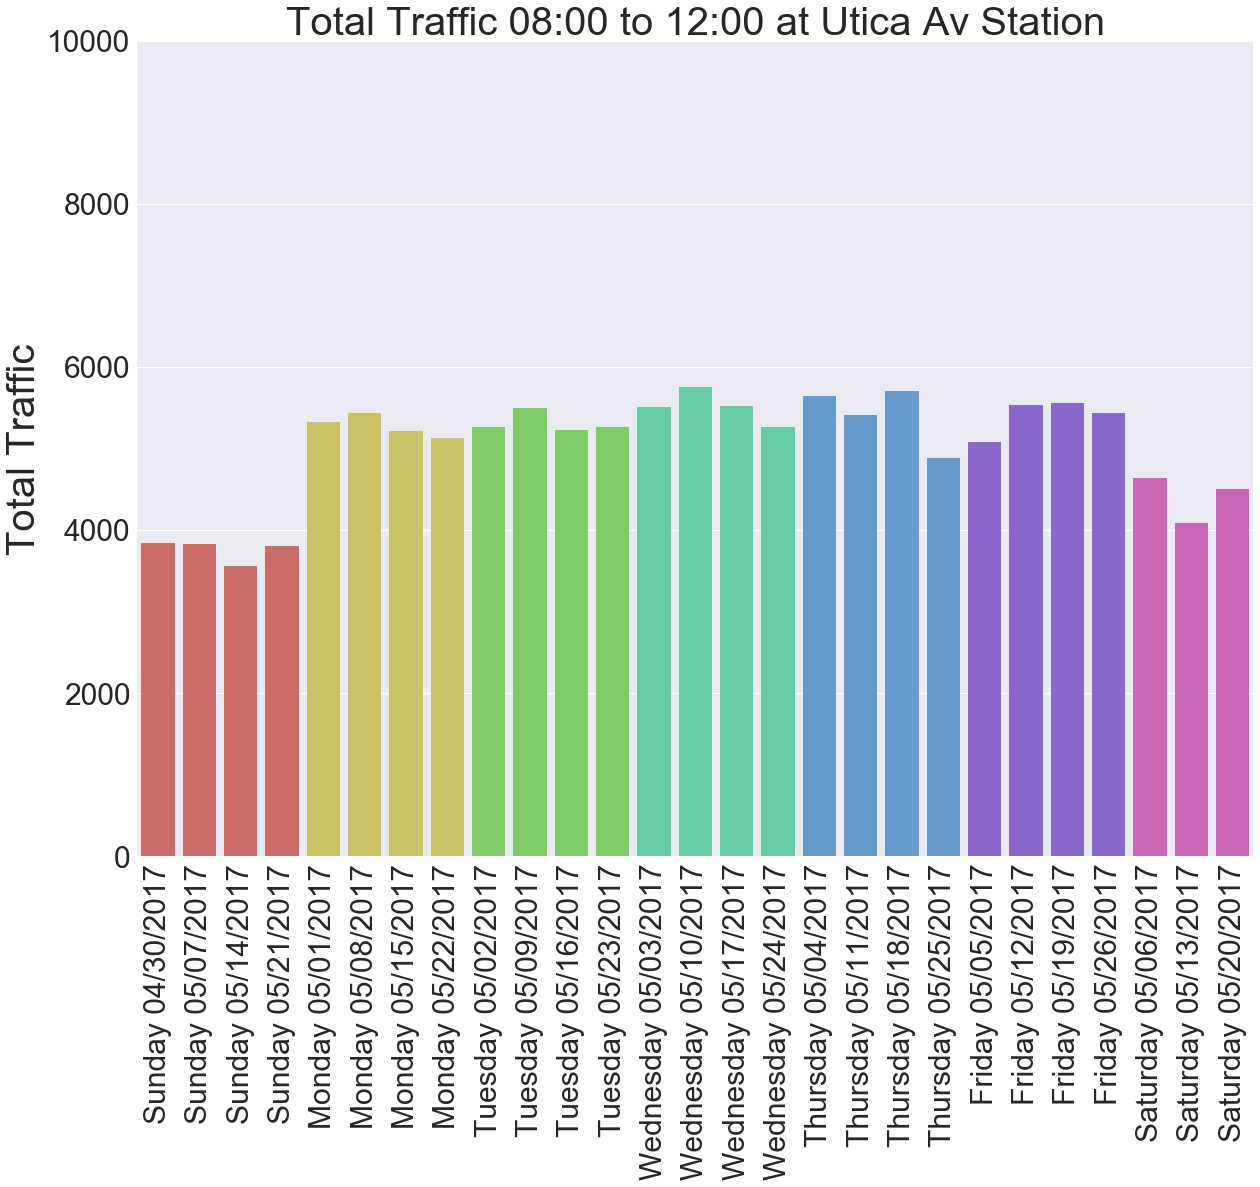

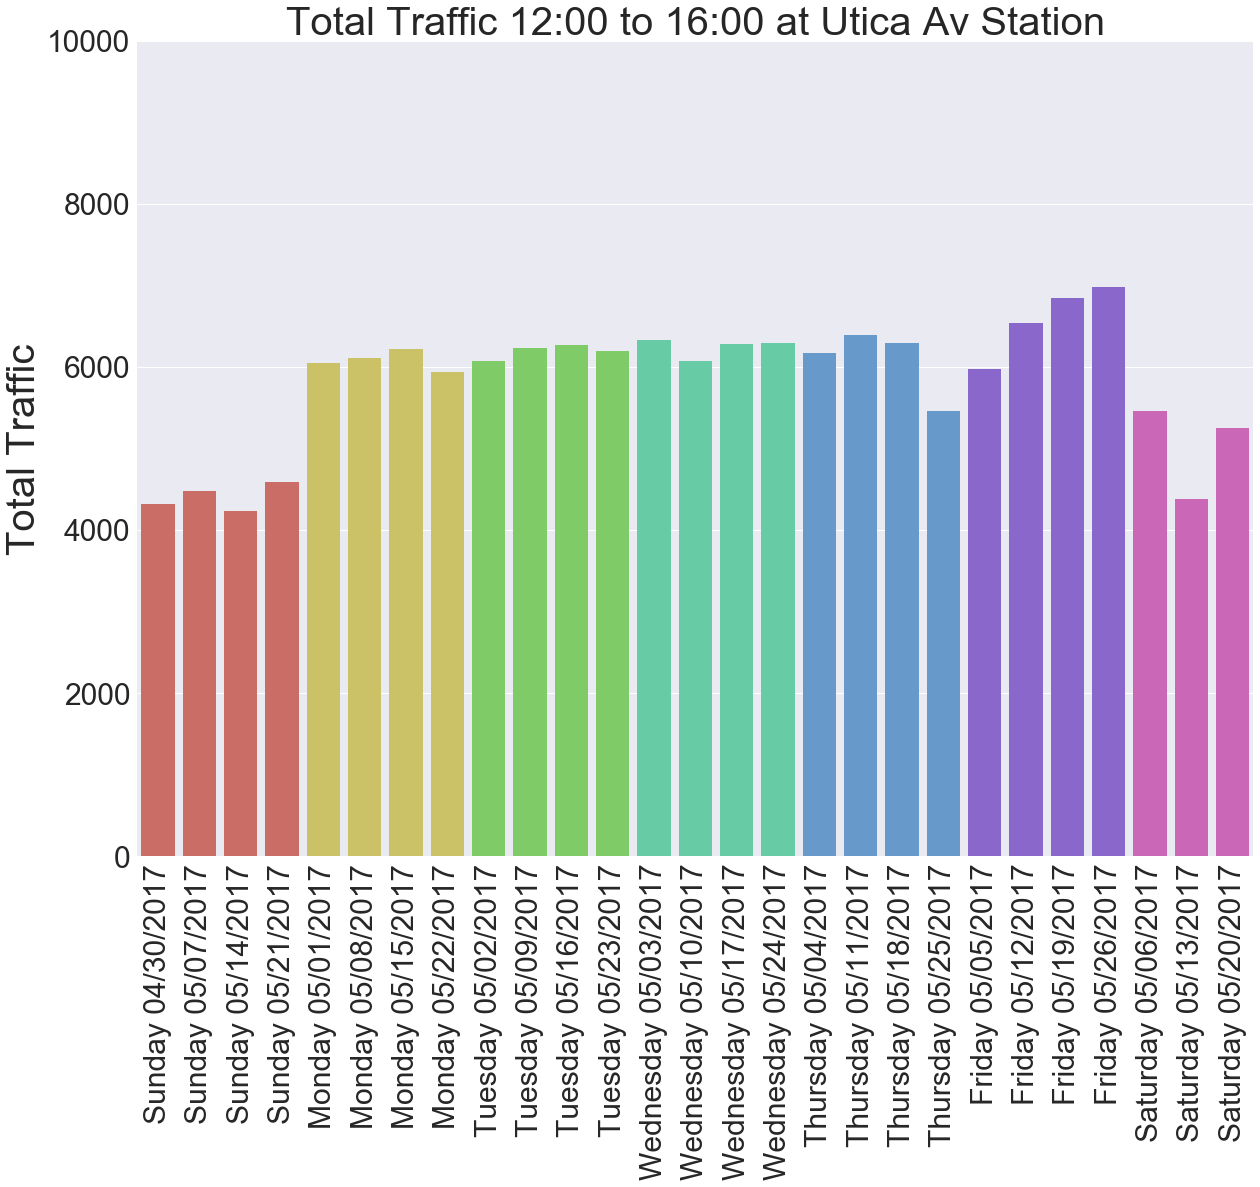

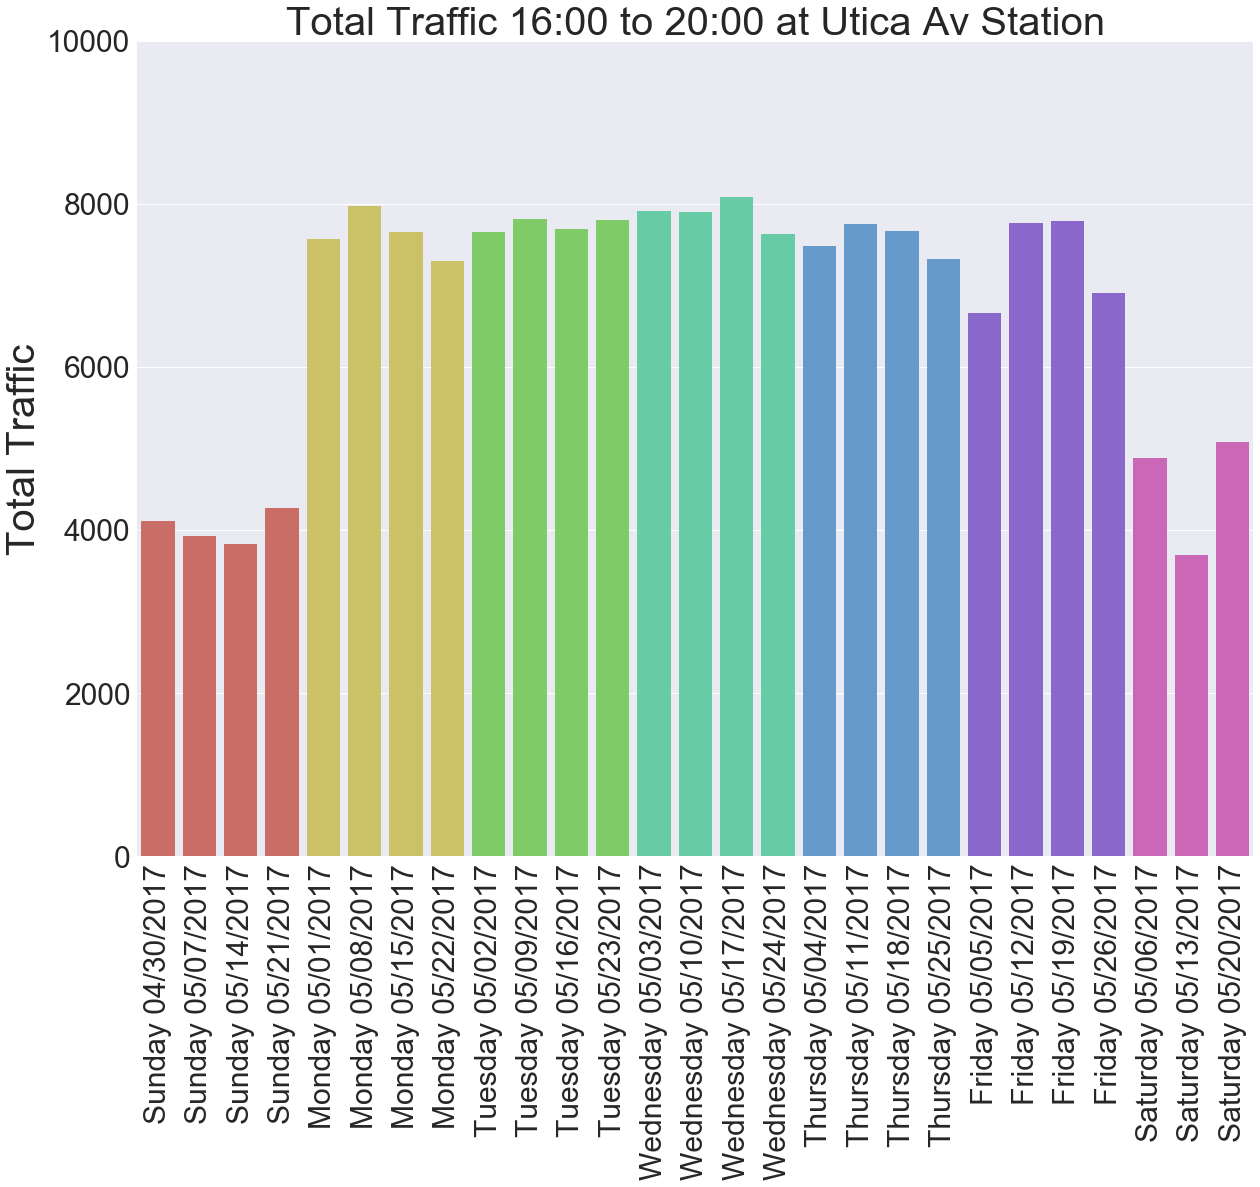

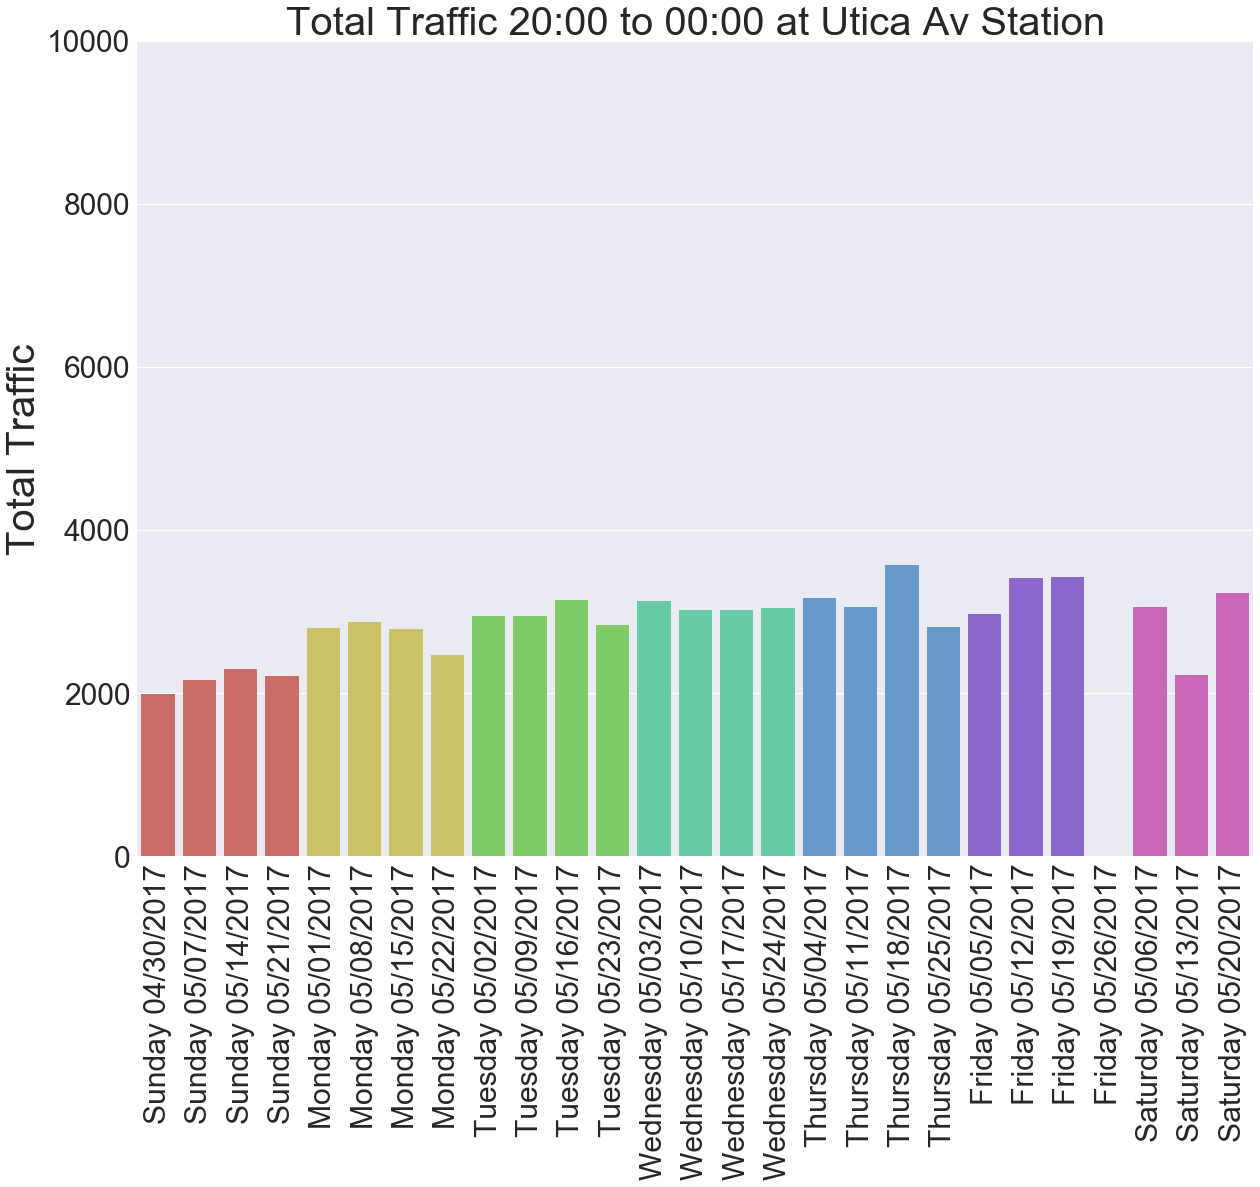

In [15]:
# plot all dataframes (separated by time period)
for i, df in enumerate(plot_list):
    fig, ax = plt.subplots()
    fig.set_size_inches(20,15)

    sns.set(font_scale=3)

    fig=sns.barplot(x = df.range_dt, y = df.Total_Traffic, palette = df.color)
    ax.set_xticklabels(df.range_dt, rotation=90);

    fig.set_title("Total Traffic " + time_list[i] + " at Utica Av Station",
                  fontsize=40)
    plt.ylim(0, 10000)
    ax.set_xlabel('')
    ax.set_ylabel('Total Traffic', fontsize=40);

In [325]:
# import data from cleaning
df = pd.read_csv('station_traffic.csv')
del df['Unnamed: 0']

In [326]:
# just get "important times" (rush hours)
pert_times = ['04:00 to 08:00', "16:00 to 20:00"]
pert_days = ['Monday','Tuesday','Wednesday','Thursday','Friday']

df_imp = df[df.Time_Range.isin(pert_times)]
df_imp = df_imp[df_imp.Day.isin(pert_days)]

In [327]:
# get totals for important time ranges
df_stat_t = df_imp.groupby(['STATION', 'Time_Range'])['Total_Traffic'].mean().reset_index()
df_stat_t = df_stat_t.rename(columns={'Time_Range': 'Time Range'})

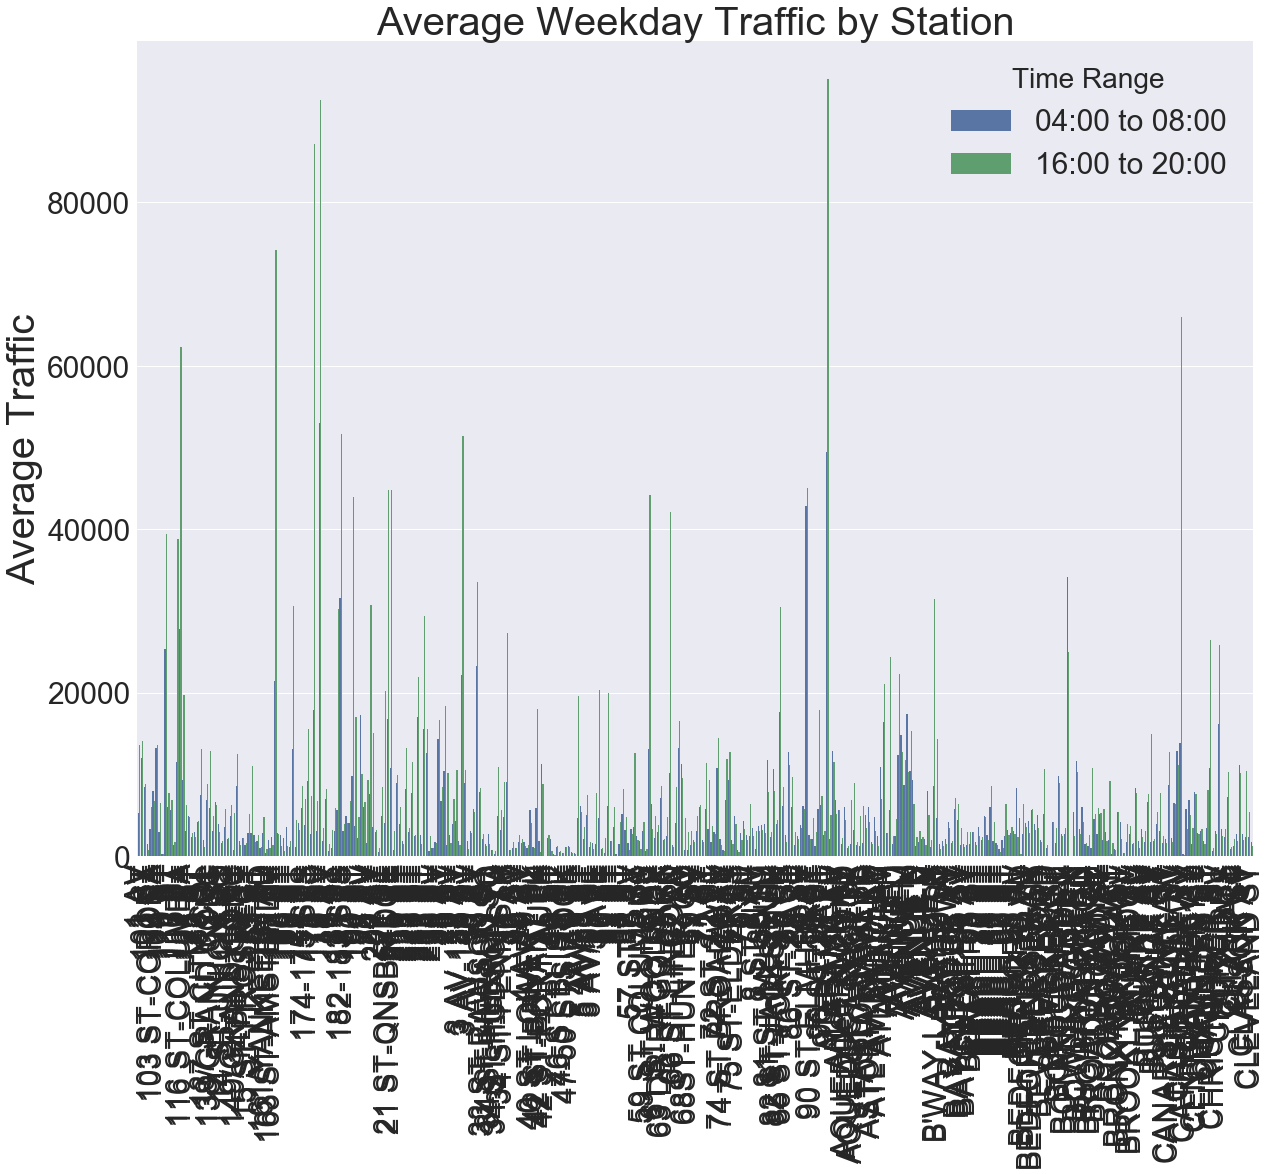

In [328]:
fig, ax = plt.subplots()
fig.set_size_inches(20,15)

sns.set(font_scale=3)

fig=sns.barplot(x = df_stat_t.STATION, 
                y = df_stat_t.Total_Traffic, 
                hue = df_stat_t['Time Range'])
ax.set_xticklabels(df_stat_t.STATION, rotation=90);

fig.set_title("Average Weekday Traffic by Station",
              fontsize=40)
ax.set_xlabel('');
ax.set_ylabel('Average Traffic', fontsize=40);

In [329]:
# get dfs from each time frame
df_48 = df_stat_t[df_stat_t['Time Range'] == '04:00 to 08:00'].copy()
df_1620 = df_stat_t[df_stat_t['Time Range'] == '16:00 to 20:00'].copy()

df_48.sort_values('Total_Traffic', ascending = False, inplace = True)
df_1620.sort_values('Total_Traffic', ascending = False, inplace = True)

In [330]:
# find the best in each time frame, some may overlap
# just playing with the slice until I get about 20

list_48 = df_48.STATION[:15].tolist()
list_1620 = df_1620.STATION[:15].tolist()
top_list = list_48 + list(set(list_1620) - set(list_48))
top_list.sort()

df_t20 = df_stat_t[df_stat_t.STATION.isin(top_list)].copy()
df_t20.sort_values("STATION", inplace=True)


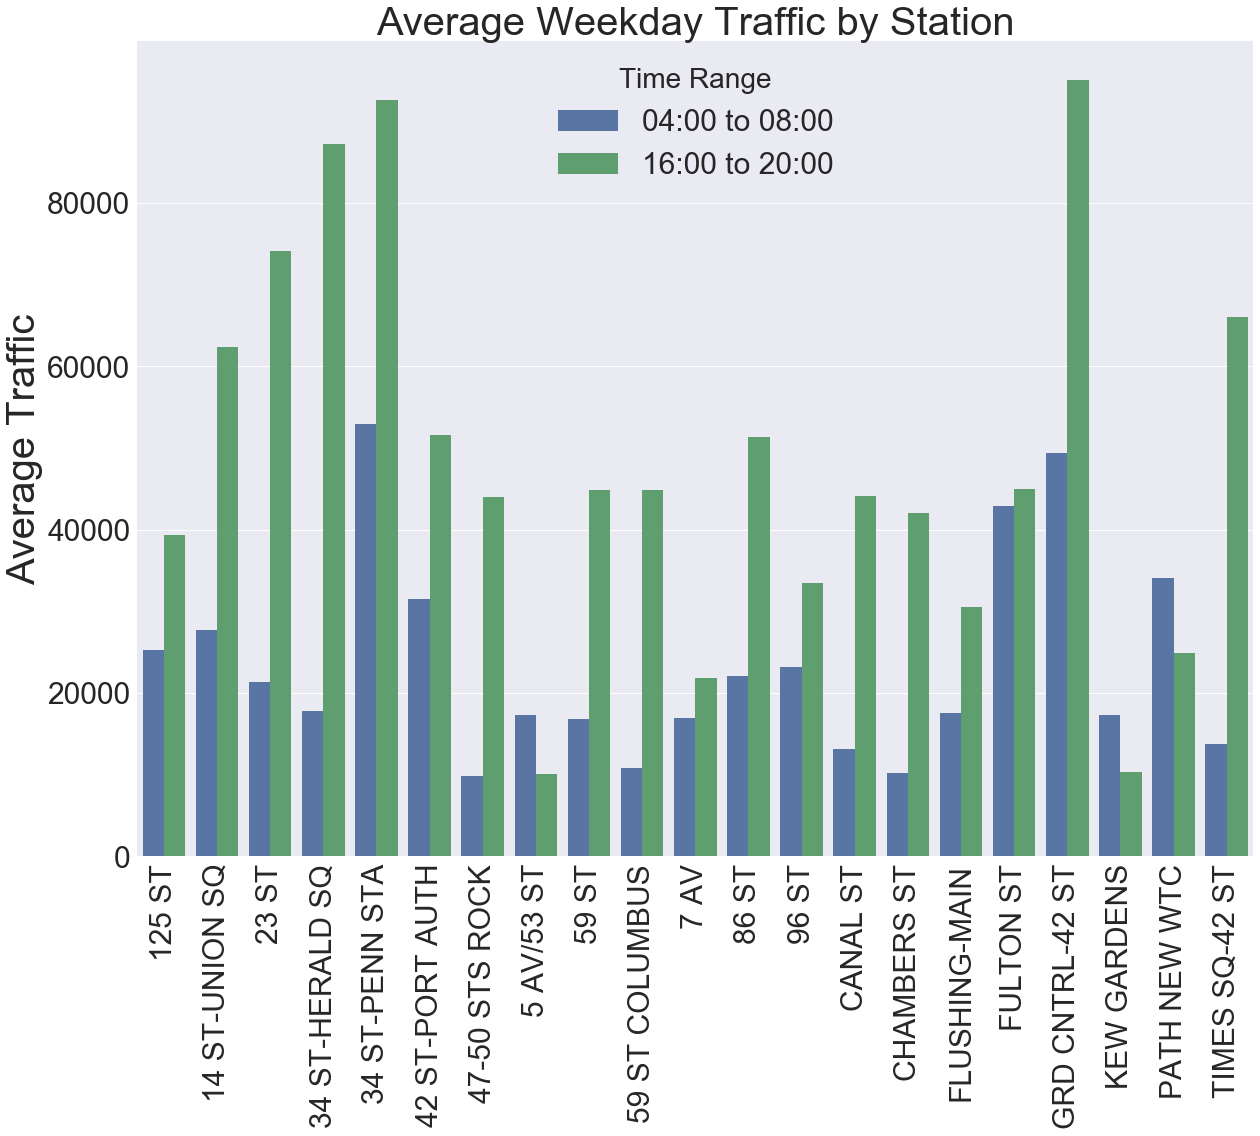

In [331]:
fig, ax = plt.subplots()
fig.set_size_inches(20,15)

sns.set(font_scale=3)

fig=sns.barplot(x = df_t20.STATION, 
                y = df_t20.Total_Traffic, 
                hue = df_t20['Time Range'])
ax.set_xticklabels(top_list, rotation=90);

fig.set_title("Average Weekday Traffic by Station",
              fontsize=40)
ax.set_xlabel('');
ax.set_ylabel('Average Traffic', fontsize=40);

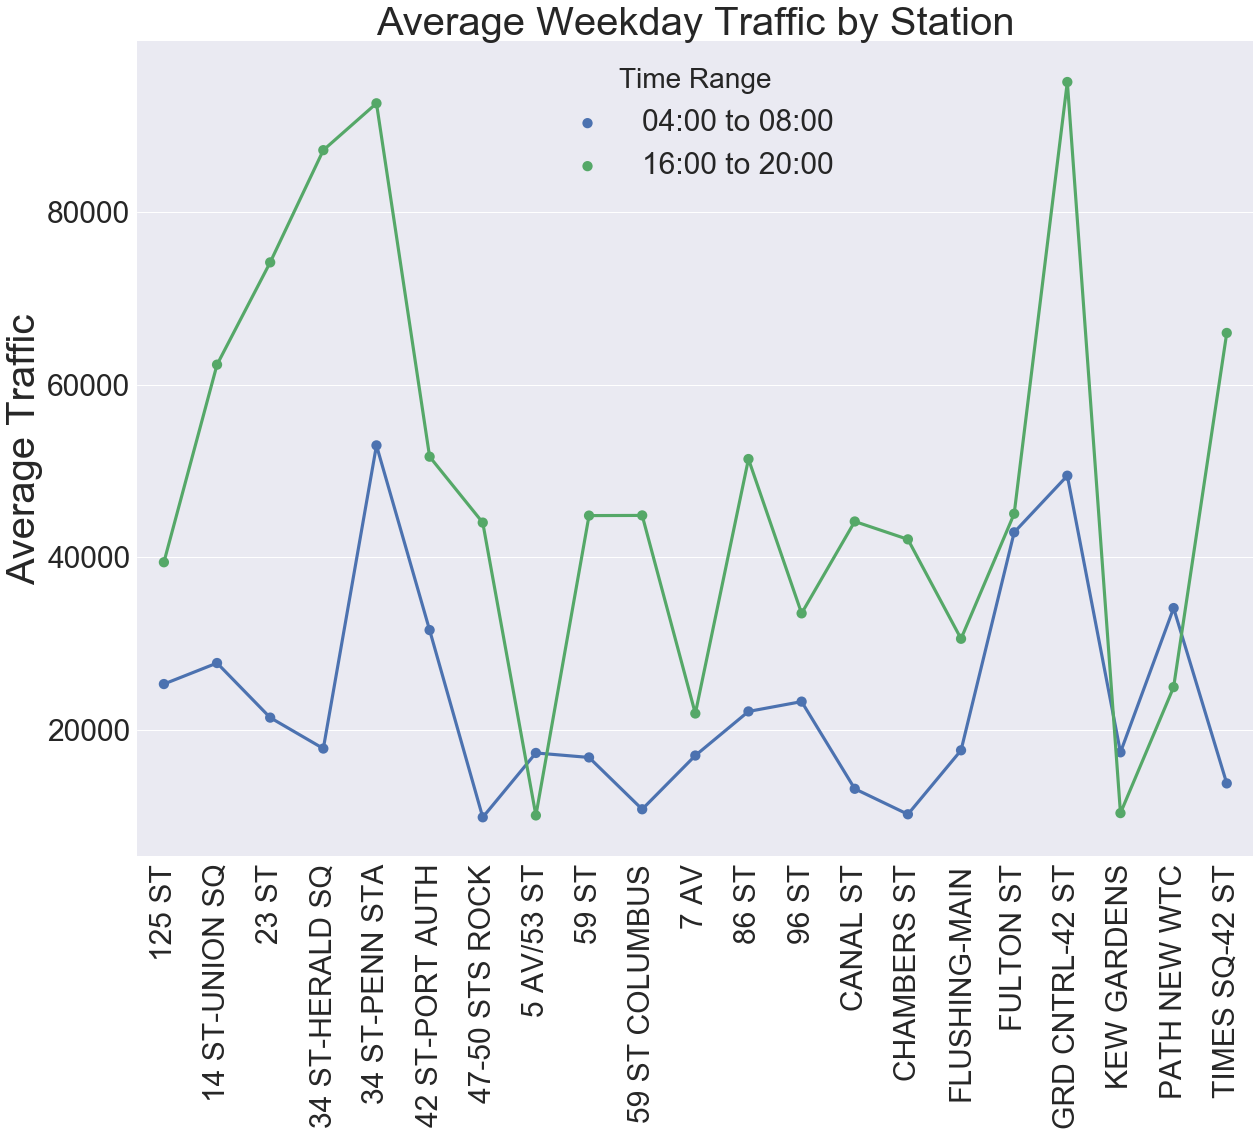

In [332]:
fig, ax = plt.subplots()
fig.set_size_inches(20,15)

sns.set(font_scale=3)

fig=sns.pointplot(x = df_t20.STATION, 
                y = df_t20.Total_Traffic, 
                hue = df_t20['Time Range'])

ax.set_xticklabels(top_list, rotation=90);

fig.set_title("Average Weekday Traffic by Station",
              fontsize=40)
ax.set_xlabel('');
ax.set_ylabel('Average Traffic', fontsize=40);

In [333]:
# create a list of the top stations to order by
df_stat_tot = df_stat_t.groupby('STATION')['Total_Traffic'].sum().reset_index()
df_comb_t20 = df_stat_tot[df_stat_tot.STATION.isin(top_list)].copy()
df_comb_t20.sort_values('Total_Traffic', ascending=False, inplace=True)
t20_ordered = df_comb_t20.STATION.tolist()

In [334]:
# order by that list (categorical)
df_t20['STATION'] = pd.Categorical(
    df_t20['STATION'], categories=t20_ordered, ordered=True)

df_t20 = df_t20.sort_values(['STATION']).reset_index()
df_t20 = df_t20.sort_index()
df_t20 = df_t20.reset_index()

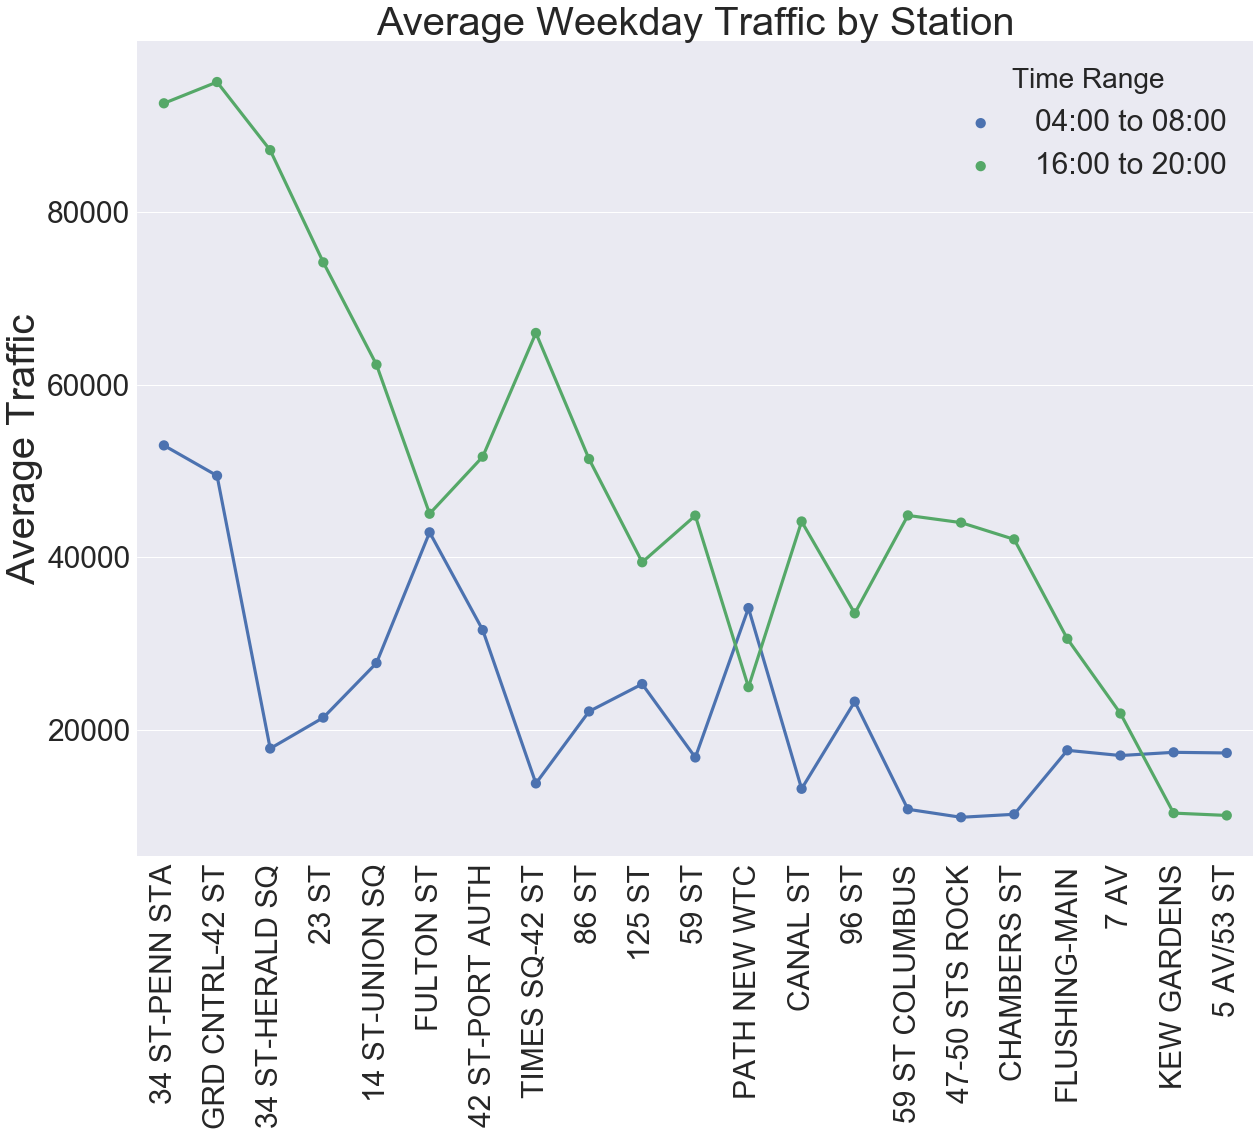

In [335]:
fig, ax = plt.subplots()
fig.set_size_inches(20,15)

sns.set(font_scale=3)

fig=sns.pointplot(x = df_t20.STATION, 
                y = df_t20.Total_Traffic, 
                hue = df_t20['Time Range'])

ax.set_xticklabels(t20_ordered, rotation=90);

fig.set_title("Average Weekday Traffic by Station",
              fontsize=40)
ax.set_xlabel('');
ax.set_ylabel('Average Traffic', fontsize=40);

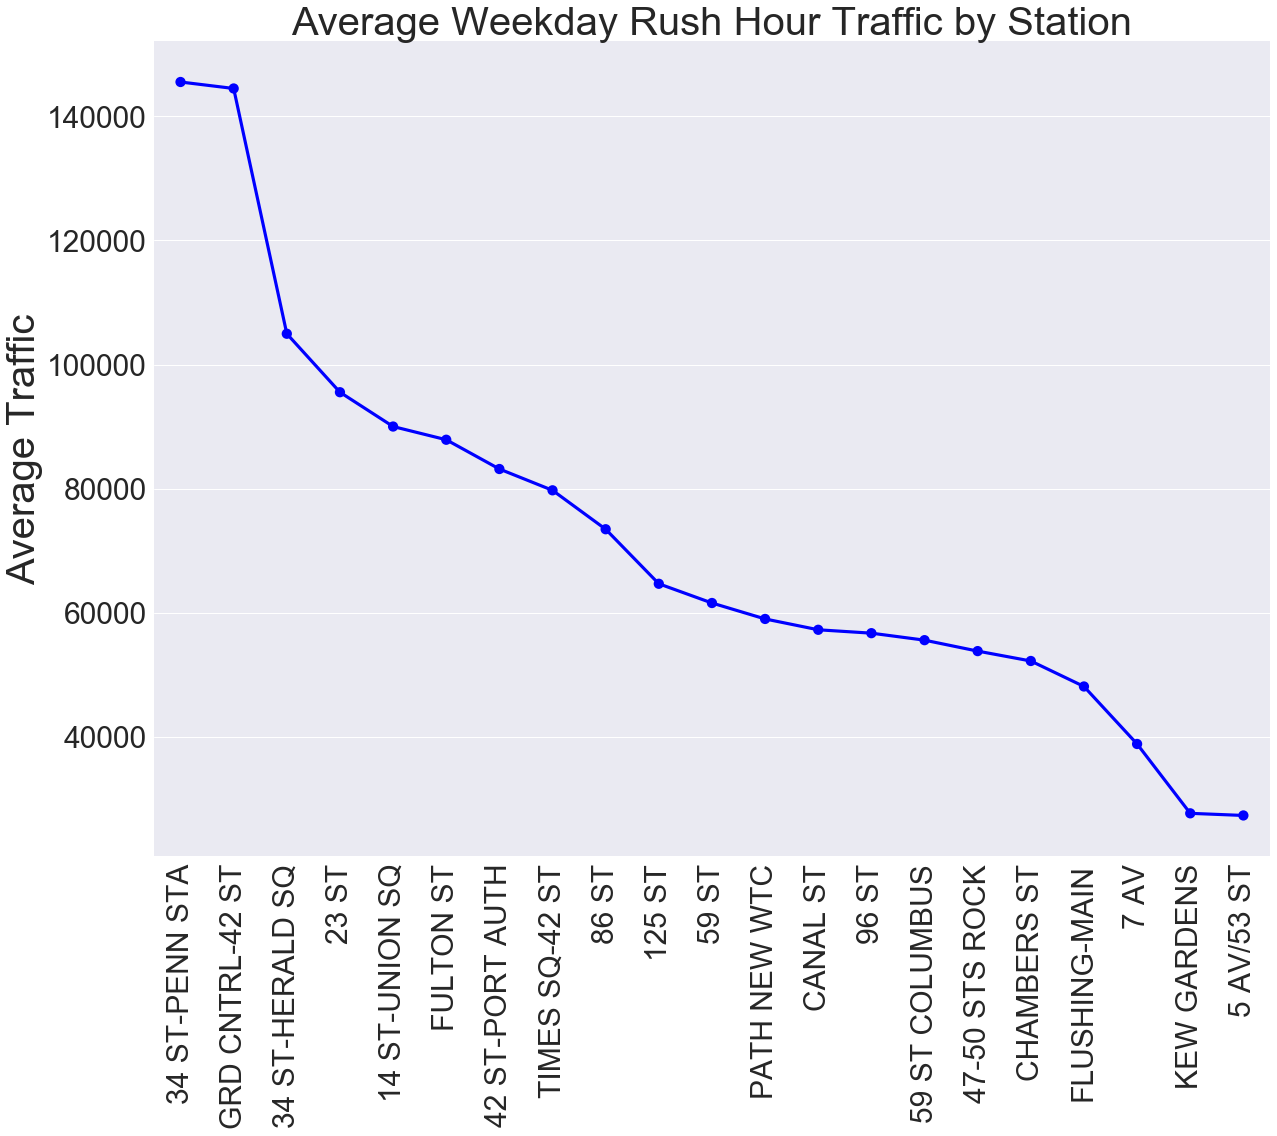

In [336]:
fig, ax = plt.subplots()
fig.set_size_inches(20,15)

sns.set(font_scale=3)

fig=sns.pointplot(x = df_comb_t20.STATION, 
                y = df_comb_t20.Total_Traffic, 
                color='blue')

ax.set_xticklabels(df_comb_t20.STATION, rotation=90);

fig.set_title("Average Weekday Rush Hour Traffic by Station",
              fontsize=40)
ax.set_xlabel('');
ax.set_ylabel('Average Traffic', fontsize=40);

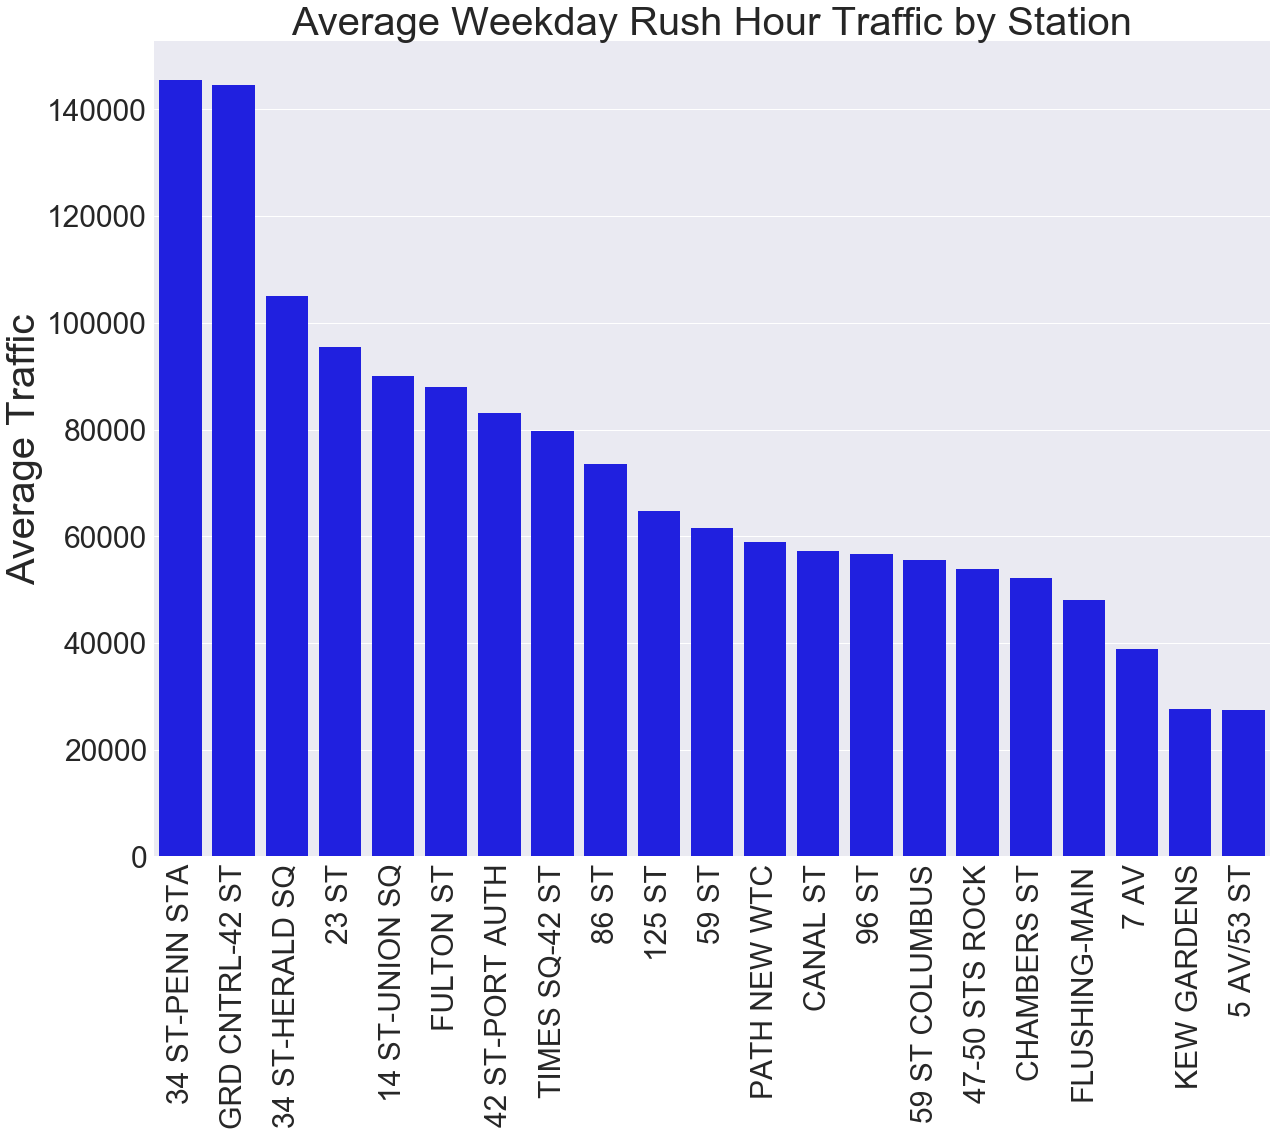

In [337]:
fig, ax = plt.subplots()
fig.set_size_inches(20,15)

sns.set(font_scale=3)

fig=sns.barplot(x = df_comb_t20.STATION, 
                y = df_comb_t20.Total_Traffic, 
                color='blue')

ax.set_xticklabels(df_comb_t20.STATION, rotation=90);

fig.set_title("Average Weekday Rush Hour Traffic by Station",
              fontsize=40)
ax.set_xlabel('');
ax.set_ylabel('Average Traffic', fontsize=40);